# Imports

In [1]:
import occCamera
import occGeomtrey
import numpy as np
import ifcopenshell, ifcopenshell.geom
from OCC.Core.Quantity import Quantity_Color, Quantity_TOC_RGB
from OCC.Core.Graphic3d import Graphic3d_BufferType
from PIL import Image
from IPython.display import display

# Test Transforms

<span style='color:orange'>
First, converting to gpTrsf and back:
</span>

In [3]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])
T = occGeomtrey.TfromRt(R,t)
gpT = occGeomtrey.T2gpTrsf(T)

print(T)
print(occGeomtrey.gpTrsf2T(gpT)-T)

[[ 0.70710678 -0.70710678  0.          1.        ]
 [ 0.70710678  0.70710678  0.          2.        ]
 [ 0.          0.          1.          3.        ]
 [ 0.          0.          0.          1.        ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<span style='color:orange'>
Nice, Now I want to show you that you can multiple gpTrsf
</span>

In [4]:
R1 = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t1 = np.array([0,0,0])
T1 = occGeomtrey.TfromRt(R1,t)

R2 = np.eye(3)
t2 = np.array([1,2,3])
T2 = occGeomtrey.TfromRt(R1,t)

T21 = T2 @ T1

gpT1 = occGeomtrey.T2gpTrsf(T1)
gpT2 = occGeomtrey.T2gpTrsf(T2)
gpT21 = gpT2*gpT1

print(T21.round(4))
print(np.round(occGeomtrey.gpTrsf2T(gpT21)-T21,4))

[[ 0.     -1.      0.      0.2929]
 [ 1.      0.      0.      4.1213]
 [ 0.      0.      1.      6.    ]
 [ 0.      0.      0.      1.    ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


<span style='color:orange'>
We can also invert transforms
</span>

In [5]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([0,0,1])
T = occGeomtrey.TfromRt(R,t)

invT = occGeomtrey.InverseTransform(T)
print(np.round(invT*T,4))

gpT = occGeomtrey.T2gpTrsf(T)
gpT.Invert()

print(np.round(occGeomtrey.gpTrsf2T(gpT)-invT,4))

[[ 1. -0.  0.  0.]
 [-0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[[ 0.  0.  0. -0.]
 [ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


<span style='color:orange'>
gpTrsf is an object from occ... lets see what we can do with it:
</span>

In [6]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])
T = occGeomtrey.TfromRt(R,t)
gpT = occGeomtrey.T2gpTrsf(T)

print('VectorialPart()')
print(occGeomtrey.gpMattoNumpy(gpT.VectorialPart()))

print('TranslationPart().Coord()')
print(gpT.TranslationPart().Coord())

print('Transforms()')
print(gpT.Transforms())

print('GetRotation().GetMatrix()')
print(occGeomtrey.gpMat3toNumpy(gpT.GetRotation().GetMatrix()))

print('Value(1,1)')
print(gpT.Value(1,1))

VectorialPart()
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]]
TranslationPart().Coord()
(1.0, 2.0, 3.0)
Transforms()
(1.0, 2.0, 3.0)
GetRotation().GetMatrix()
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Value(1,1)
0.7071067811865476


# Test Camera Transforms

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
Transform:
[[ 1.  0. -0.  0.]
 [ 0. -1. -0. -0.]
 [-0.  0. -1.  6.]
 [ 0.  0.  0.  1.]]
Eye:(2.4355994322017748e-15, -1.9984014443252818e-15, 6.0)
Direction:(-7.81734838230998e-17, -5.551115123125783e-17, -1.0)


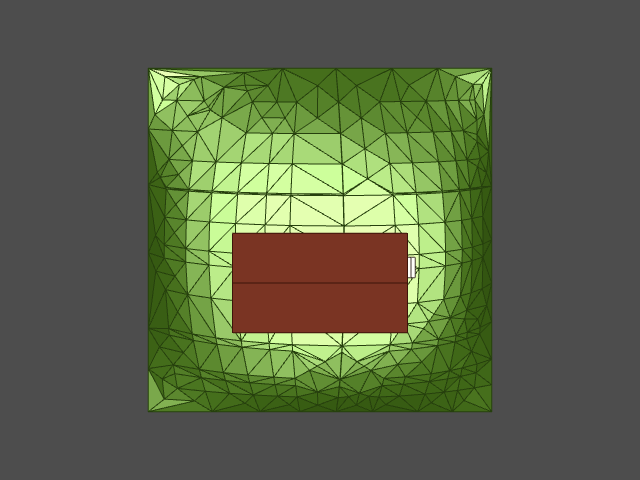

In [7]:
offscreen_renderer = occCamera.offlineRenderIFC()
cam = offscreen_renderer.View.Camera()

pose = np.array([0,0,6,np.pi,0,0])
occCamera.moveCam2Pose(cam,pose)
print(f'Transform:\n{occCamera.getCameraTransform(cam).round(4)}')
print(f'Eye:{cam.Eye().Coord()}')
print(f'Direction:{cam.Direction().Coord()}')

data = offscreen_renderer.GetImageData(640, 480, Graphic3d_BufferType.Graphic3d_BT_RGB) #There is also: Graphic3d_BT_Depth!
img = Image.frombytes('RGB', (640, 480), data)
display(img)

# Test Camera Intrinsics

In [19]:
#occ has world coordiante system, projection coordiante system, and view coordinate system
offscreen_renderer = occCamera.offlineRenderIFC()
cam = offscreen_renderer.View.Camera()
P0 = occCamera.getProjectionMatrix(cam)
print(P0)

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
[[ 0.05363987  0.          0.         -0.        ]
 [ 0.          0.07151983  0.         -0.        ]
 [ 0.          0.         -0.06425702 -1.99999684]
 [ 0.          0.          0.          1.        ]]


In [18]:
# Get stereographic focus value. returns absolute or relative stereographic focus value depending on its definition type.
print(f'ZFocus = {cam.ZFocus()}')
# Get stereographic focus definition type. returns definition type used for stereographic focus.
print(f'ZFocusType = {cam.ZFocusType()}')
#Get the near z-clipping plane position. returns the distance of the plane from the eye.
print(f'ZNear = {cam.ZNear()}')
#Get the far z-clipping plane position. returns the distance of the plane from the eye.
print(f'ZFar = {cam.ZFar()}')
#Calculate view plane size at center (target) point and distance between zfar and znear planes. returns values in form of gp_pnt (width, height, depth).
print(f'ViewDimensions().Coord() = {cam.ViewDimensions().Coord()}')
# Get center of the camera, e.g. the point where camera looks at. this point is computed as eye() translated along direction() at distance(). returns the point where the camera looks at.
print(f'Center().Coord() = {cam.Center().Coord()}')
# Get distance of Eye from camera Center
print(f'Distance() = {cam.Distance()}')
# camera scale factor.
print(f'Scale() = {cam.Scale()}')
# Get camera display ratio. returns display ratio.
print(f'Aspect() = {cam.Aspect()}')
# Get intraocular distance value. returns absolute or relative iod value depending on its definition type.
print(f'IOD() = {cam.IOD()}')
# Get camera axial scale. returns camera’s axial scale.
print(f'AxialScale().Coord() = {cam.AxialScale().Coord()}')
# Get Intraocular distance value.
print(f'IOD() = {cam.IOD()}')
#get ProjectionType. Orthographic == 0, Prespective == 1
print(f'ProjectionType() = {cam.ProjectionType()}')

ZFocus = 1.0
ZFocusType = 1
ZNear = 15.56245289540218
ZFar = 46.687456914661134
ViewDimensions().Coord() = (37.285698280635934, 27.964273710476952, 31.125004019258952)
Center().Coord() = (0.0, 0.0, -1.174999713897705)
Distance() = 31.124953474520186
Scale() = 27.964273710476952
Aspect() = 1.3333333333333333
IOD() = 0.05
AxialScale().Coord() = (1.0, 1.0, 1.0)
IOD() = 0.05
ProjectionType() = 0


In [7]:
cam.SetDistance(10.0)
cam.SetFOVy(100.0)
cam.SetZFocus(cam.FocusType_Absolute,55.0)
cam.SetIOD(cam.IODType_Absolute,100)
n,f = 10, 50
cam.SetZRange(n,f) #affects P1[2,2] P1[3,2]
cam.SetScale(30.0) #affects P1[1,1] P1[0,0]
cam.SetAspect(0.5) #affects P1[1,1] P1[0,0]
# cam.SetTile

P1 = occCamera.getProjectionMatrix(cam)
print('P0 = ')
print(P0)
print('P1 = ')
print(P1)

print(f'P1[0,0] = {2/cam.Scale()}') 
print(f'P1[1,1] = {cam.Aspect()*P1[0,0]}') 
print(f'P1[2,2] = {-2/(f-n)}') 
print(f'P1[2,3] = {-(f+n)/(f-n)}') 

P0 = 
[[ 0.05363987  0.          0.         -0.        ]
 [ 0.          0.07151983  0.         -0.        ]
 [ 0.          0.         -0.06425702 -1.99999684]
 [ 0.          0.          0.          1.        ]]
P1 = 
[[ 0.06666667  0.          0.         -0.        ]
 [ 0.          0.03333333  0.         -0.        ]
 [ 0.          0.         -0.05       -1.5       ]
 [ 0.          0.          0.          1.        ]]
P1[0,0] = 0.06666666666666667
P1[1,1] = 0.03333333333333333
P1[2,2] = -0.05
P1[2,3] = -1.5


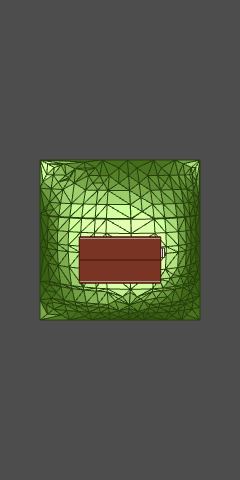

In [195]:
pose = np.array([0,0,6,np.pi,0,0])
occCamera.moveCam2Pose(cam,pose)
h = 480
w = round(h * cam.Aspect())
data = offscreen_renderer.GetImageData(w, h, Graphic3d_BufferType.Graphic3d_BT_RGB)
img = Image.frombytes('RGB', (w, h), data)
display(img)

[According to Thomas, there is no direct method to set the projection matrix](https://github.com/tpaviot/pythonocc-core/issues/1064)

We have to make a work-around using these set methods:
cam.SetDistance
cam.SetFOVy
cam.SetZFocus
cam.SetZRange
cam.SetIOD
cam.SetScale
cam.SetTile
cam.SetAspect

In [58]:
import math as m
print(1/(1/m.tan(m.pi/8)))
n = 15.56245
f = 46.68745

-(n+f)/(f-n)
-(2*f*n)/(f-n)



0.4142135623730951


-46.68730000016064

# Test Laser Scanner

In [19]:
settings = ifcopenshell.geom.settings()
settings.set(settings.USE_PYTHON_OPENCASCADE, True)
settings.set(settings.USE_WORLD_COORDS, True)

model = ifcopenshell.open('../data/IfcOpenHouse_IFC4.ifc')
walls = model.by_type('IfcWall')

shape = ifcopenshell.geom.create_shape(settings, walls[0]).geometry

In [45]:
topo = OCCUtils.Topo(shape)
faces = topo.faces()
for face in faces:
    surf = OCC.Core.BRep.BRep_Tool.Surface(face)
print(surf)

<class 'Geom_Surface'>


In [8]:
settings = ifcopenshell.geom.settings()
# settings.set(settings.USE_PYTHON_OPENCASCADE, True)
# settings.set(settings.USE_WORLD_COORDS, True)
import OCC
import OCCUtils


import OCC.Core.TopExp


model = ifcopenshell.open('../data/IfcOpenHouse_IFC4.ifc')
walls = model.by_type('IfcWall')
import multiprocessing

for wall in walls:
    shape = ifcopenshell.geom.create_shape(settings, wall).geometry
#     exp = OCC.Core.TopExp.TopExp_Explorer(shape, OCC.Core.TopAbs.TopAbs_FACE)
#     while exp.More():
#         face = OCC.Core.TopoDS.topods.Face(exp.Current())
#         prop = OCC.Core.BRepGProp.BRepGProp_Face(face)

count = 0
iterator = ifcopenshell.geom.iterator(settings, model, multiprocessing.cpu_count())
if iterator.initialize():
     while iterator.next():
            count = count +1
            shape = iterator.get()
            print(shape)
            element = model.by_guid(shape.guid)
            faces = shape.geometry.faces # Indices of vertices per triangle face e.g. [f1v1, f1v2, f1v3, f2v1, f2v2, f2v3, ...]
            verts = shape.geometry.verts # X Y Z of vertices in flattened list e.g. [v1x, v1y, v1z, v2x, v2y, v2z, ...]
            materials = shape.geometry.materials # Material names and colour style information that are relevant to this shape
            material_ids = shape.geometry.material_ids # Indices of material applied per triangle face e.g. [f1m, f2m, ...]
print('went over {} shapes'.format(count))

<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::TriangulationElement< double,double > *' at 0x7f0423e9c240> >
<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::TriangulationElement< double,double > *' at 0x7f0423e9c690> >
<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::TriangulationElement< double,double > *' at 0x7f0423e9c6c0> >
<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::TriangulationElement< double,double > *' at 0x7f0423e9c480> >
<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::TriangulationElement< double,double > *' at 0x7f0423e9c0c0> >
<ifcopenshell.ifcopenshell_wrapper.triangulation_element_double_precision; proxy of <Swig Object of type 'IfcGeom::

In [7]:
from OCC.Core.IntAna import IntAna_IntConicQuad
from OCC.Core.Precision import precision_Angular, precision_Confusion #these are numbers...
intersection = IntAna_IntConicQuad(ellips,
                                    plane,
                                    precision_Angular(),
                                    precision_Confusion())
# if nb_results > 0:

pnt = gp_Pnt()
ray = Geom_Line (gp_Lin (pnt, gp_Dir(0, -0.1, 1)))

NameError: name 'ellips' is not defined

In [ ]:
import OCC.Core.IntAna
OCC.Core.IntAna.IntAna_Line

In [34]:
import ifcopenshell.util.element
psets = ifcopenshell.util.element.get_psets(walls[0])
psets

{}

In [ ]:
R = occGeomtrey.eul2R_zyx(0,0,np.pi/4) 
t = np.array([1,2,3])

# Depth Camera

In [ ]:
sz = (1024,768)
offscreen_renderer = occRobotics.offlineRenderIFC()
offscreen_renderer.Create()
offscreen_renderer.SetSize(sz[0], sz[1])
offscreen_renderer.SetModeShaded()
data = offscreen_renderer.GetImageData(sz[0],sz[1],Graphic3d_BufferType.Graphic3d_BT_Depth)
print(data)

#img = Image.frombytes('RGB',sz, data)
#display(img)

#picture is all black!
# can be resolved? https://github.com/tpaviot/pythonocc-core/issues/854

 ###### 3D rendering pipe initialisation #####
Display3d class initialization starting ...
Aspect_DisplayConnection created.
Graphic_Driver created.
V3d_Viewer created.
AIS_InteractiveContext created.
V3d_View created
Display3d class successfully initialized.
 ########################################
Display3d class successfully initialized.
 ########################################
None
